### Importing the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>What does this data set mean.</h3>
____



## Part 1. Cleaning the data.

In [2]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to deal with ..
- Different variables
- Null values

In [3]:
train.shape

(891, 12)

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**We use the Method 2 i.e(sklearn.preprocessing.Imputer)**

Just because it is easy to use....


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
Imp=Imputer(missing_values='NaN',strategy='median',axis=1)
new=Imp.fit_transform(train.Age.values.reshape(1,-1))
train['Age2']=new.T


In [6]:
train.drop('Age',axis=1,inplace=True)


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [8]:
train.set_index('PassengerId',inplace=True)
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)


train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

train['Age2']=train['Age2'].astype(int)
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [9]:
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head()
print(type(train.Age2))

<class 'pandas.core.series.Series'>


In [10]:
train.shape
# 891 rows and 9 columns.

(891, 9)

In [11]:
train.Survived.value_counts()/len(train)*100


0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [12]:
train.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.453423,1.288440,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,1.124206,0.812038,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [13]:
train.groupby('Survived').mean()

,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,
0,2.531876,0.553734,0.329690,1.185792,1.31694,0.852459,0.085610,0.777778
1,1.950292,0.473684,0.464912,1.883041,1.24269,0.318713,0.087719,0.634503


In [14]:
train.groupby('Sex_male').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.815287,1.210191,0.114650,0.646497
1,0.188908,2.389948,0.429809,0.235702,1.256499,1.331023,0.071057,0.764298


**Correlation Matrix and Heatmap**

In [15]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.358005,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.113812,-0.237585,-0.227213,-0.035715
Age2,-0.044492,-0.358005,-0.218846,-0.134014,0.113812,1.000000,0.071125,-0.079779,0.016203
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.035715,0.016203,0.125722,-0.496624,1.000000


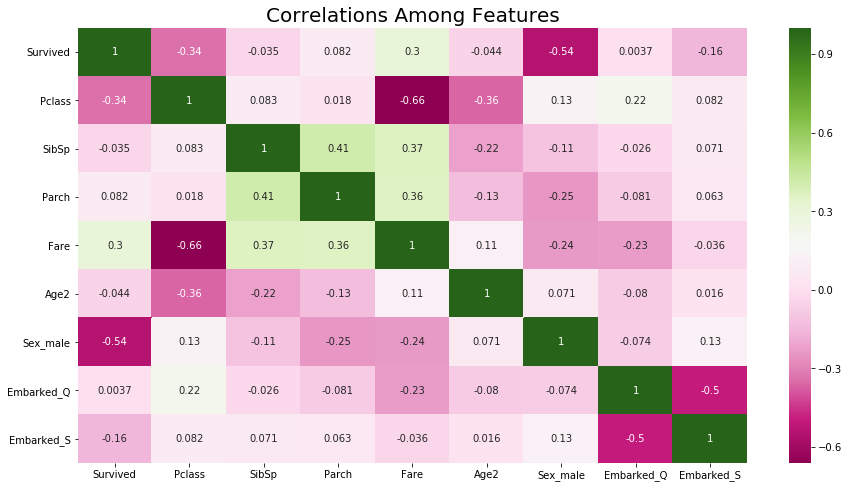

In [16]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

**Gender and Survived**


([<matplotlib.axis.XTick at 0x1ef01548400>,
 <a list of 2 Text xticklabel objects>)

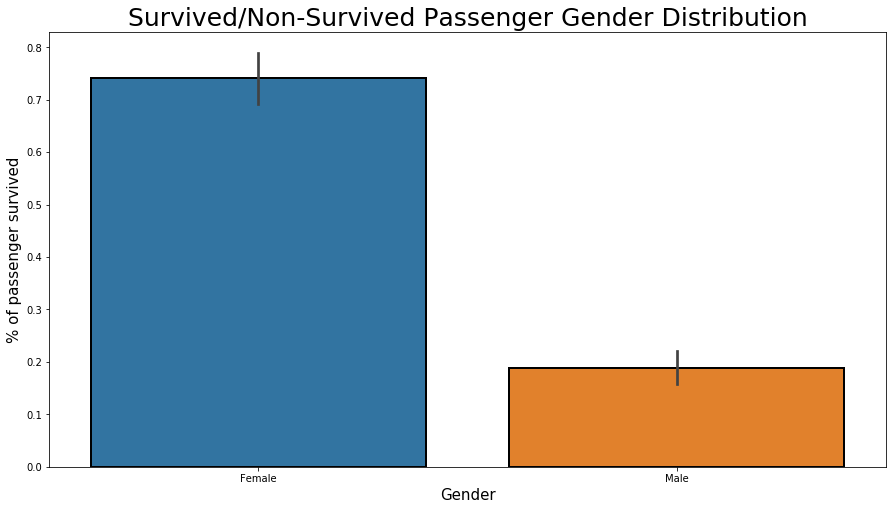

In [17]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex_male", y = "Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(train.Sex_male.unique()), labels)



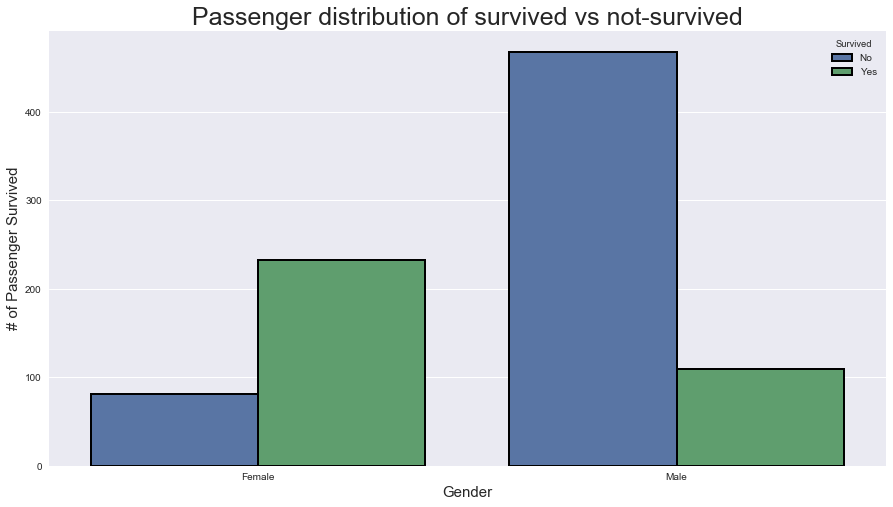

In [18]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
plt.xticks(sorted(train.Survived.unique()),labels)
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


**Pclass and Survived**

In [19]:
train.head(4)

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1


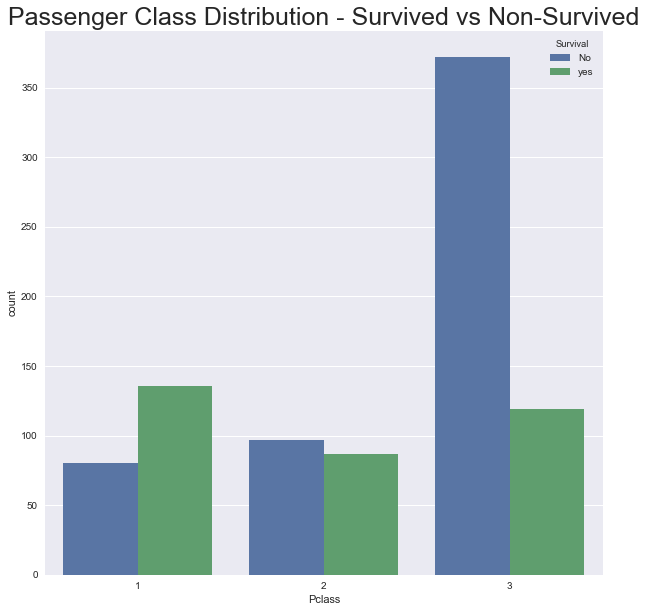

In [20]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

([<matplotlib.axis.XTick at 0x1ef012257f0>,
 <a list of 3 Text xticklabel objects>)

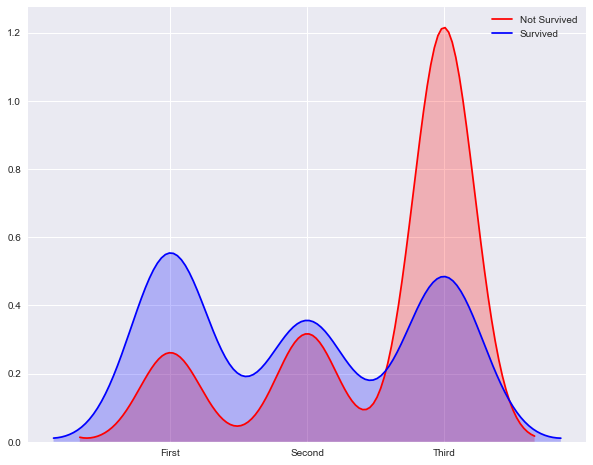

In [21]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

**Fare and Survived**

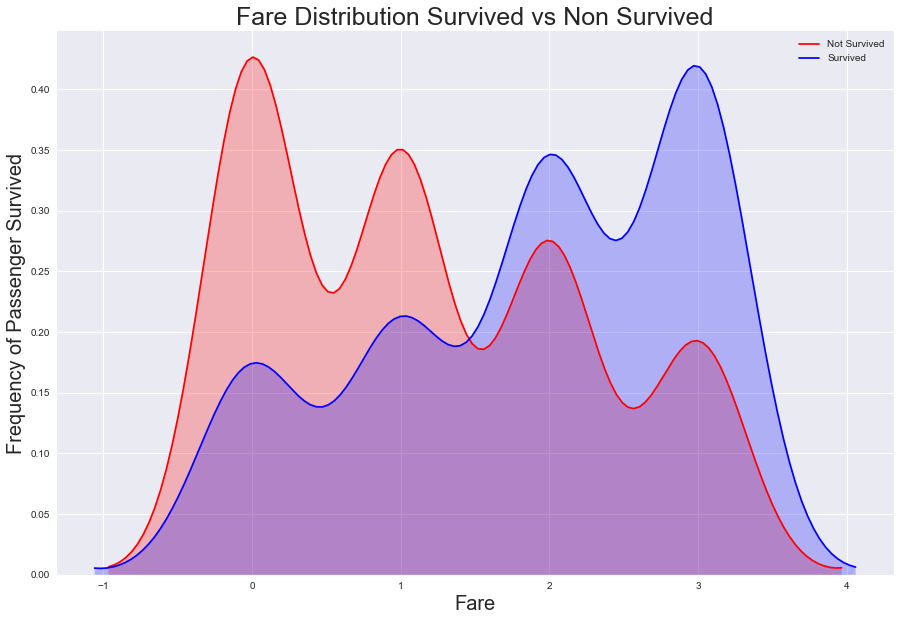

In [22]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

**Age and Survived**

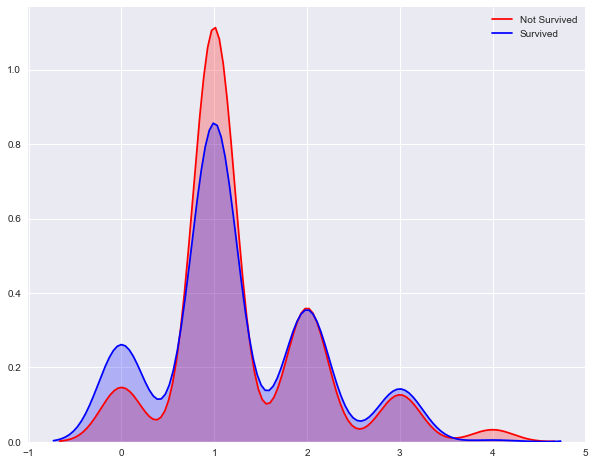

In [23]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')


**Modeling the Data**

In [24]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)


<h2>Classifier Comparision</h2>

By Classifier Comparison we choose which model best for the given data.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

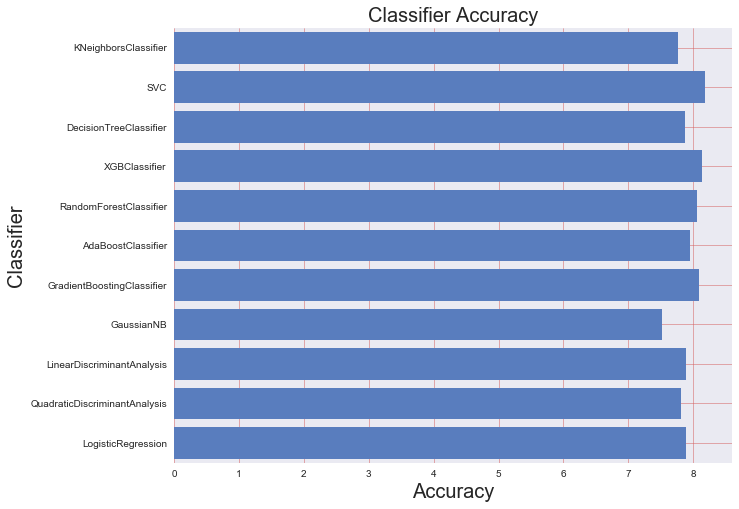

In [27]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9,10]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)


<h2>Prediction</h2>

Lets use the SVC classifier to predict our data.

In [28]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


In [29]:
classifier=SVC()
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
testIm=Imputer(missing_values='NaN',strategy='most_frequent',axis=1)
Age1=testIm.fit_transform(test.Age.values.reshape(1,-1))
Fare2=testIm.fit_transform(test.Fare.values.reshape(1,-1))
test.drop(['Name','Cabin','Age','Ticket','Fare'],axis=1,inplace=True)
test['Age1']=Age1.T
test['Fare2']=Fare2.T
test.set_index('PassengerId',inplace=True)


In [31]:
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"],drop_first=True)


test['Fare2'] = test['Fare2'].astype(int)
test.loc[test.Fare2<=7.91,'Fare2']=0
test.loc[(test.Fare2>7.91) &(test.Fare2<=14.454),'Fare2']=1
test.loc[(test.Fare2>14.454)&(test.Fare2<=31),'Fare2']=2
test.loc[(test.Fare2>31),'Fare2']=3

test['Age1']=test['Age1'].astype(int)
test.loc[ test['Age1'] <= 16, 'Age1']= 0
test.loc[(test['Age1'] > 16) & (test['Age1'] <= 32), 'Age1'] = 1
test.loc[(test['Age1'] > 32) & (test['Age1'] <= 48), 'Age1'] = 2
test.loc[(test['Age1'] > 48) & (test['Age1'] <= 64), 'Age1'] = 3
test.loc[test['Age1'] > 64, 'Age1'] = 4

<h2>Result</h2>

The final result is

In [32]:
Result=classifier.predict(test)
print(Result)
print(len(Result))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
418
